In [109]:
import pandas as pd
import seaborn as sns
import warnings

In [110]:
warnings.filterwarnings('ignore')

In [111]:
df = pd.read_csv('src/air_transport/API_IS.AIR.DPRT_DS2_en_csv_v2_5873686.csv', skiprows=4)

Eliminamos las columnas que no nos sirven

In [112]:
df.drop(columns=['Country Name', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)

Invertimos el dataframe para tener información por año

In [113]:
df = df.transpose()
df.columns =  df.iloc[0].tolist()
df.drop(df.index[0], inplace=True)

Creamos dos totales, uno sin imputar valores a los NaN, y otro intrapolando los valores

In [114]:
df = df.astype(float)
df['total_with_nan'] = df.sum(axis=1)
df_totals = df[['total_with_nan']].astype(int)
df_nan_filled = df.copy()
df_nan_filled.fillna(method='ffill', inplace=True)
df_nan_filled.fillna(method='bfill', inplace=True)
df_nan_filled['total_without_nan'] = df_nan_filled.sum(axis=1)
df_totals['total_interpolated'] = df_nan_filled[['total_without_nan']].astype(int)

<Axes: >

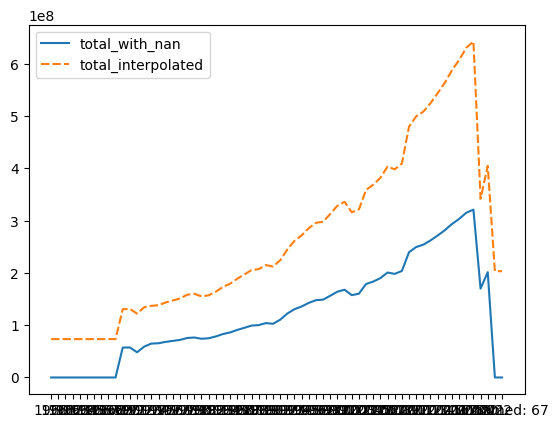

In [115]:
sns.lineplot(data = df_totals)

Vemos que la evolución del total es similar en ambos casos, lo que nos da confianza en utilizar el total con valores interpolados.

Limpiamos el dataframe y lo guardamos

In [116]:
df_totals.drop(index=df.head(10).index, inplace=True)
df_totals.drop(df.tail(2).index,inplace = True)


In [117]:
df_totals.drop(columns=['total_with_nan'], axis=1, inplace=True)
df_totals.rename(columns={'total_interpolated': 'total'}, inplace=True)

df_totals.to_csv('src/Pasajeros-por-año-1970-2021.csv')